<a href="https://colab.research.google.com/github/abxda/Colmex2023/blob/main/Taller_Colmex_D%C3%ADa_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning para detectar zonas urbanas en imágenes Sentinel-2

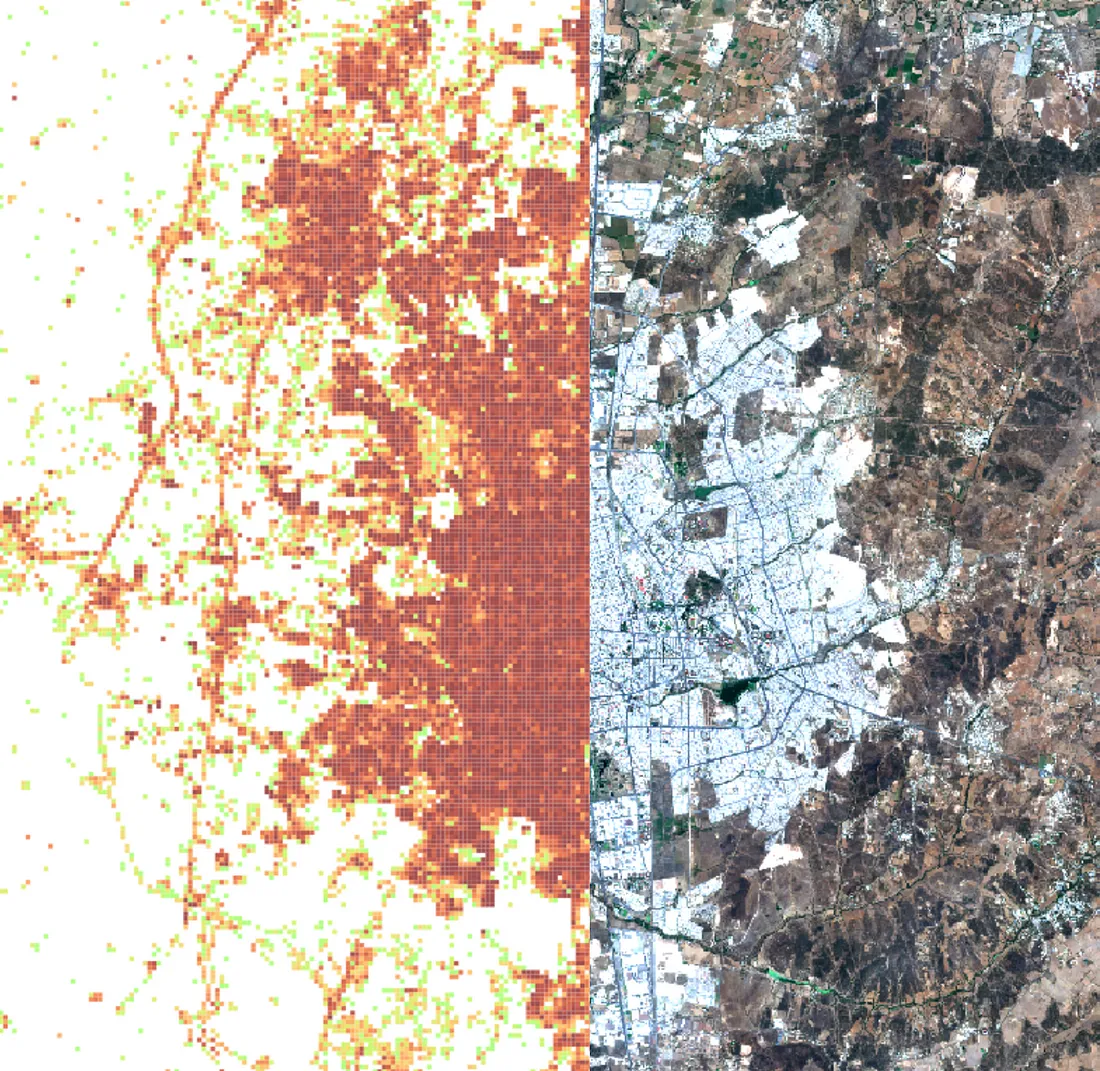


---

## **Introducción**

La utilización de imágenes satelitales para clasificar áreas urbanas ha revolucionado nuestra capacidad de comprender cómo crecen y se desarrollan las ciudades. No sólo es una herramienta poderosa para planificar el desarrollo y uso del suelo, sino que también tiene implicaciones significativas en áreas tan diversas como:

- Gestión de recursos naturales.
- Evaluación de riesgos.
- Monitoreo de desastres naturales.

### **Objetivo del Tutorial**

En este tutorial, nos sumergiremos en cómo aprovechar el poder del Machine Learning para clasificar zonas urbanas utilizando imágenes del conjunto de datos **Sentinel-2** de la Agencia Espacial Europea. En particular, nos basaremos en los siguientes recursos:

- Datos del censo de población 2020 de México para generar nuestras etiquetas.
- Técnicas especializadas para derivar características útiles para la clasificación automática.

### **Lo que Aprenderás**

Al concluir, habrás adquirido habilidades que te permitirán:

- Identificar áreas urbanas en imágenes satelitales.
- Usar técnicas avanzadas de Machine Learning en contextos de teledetección.
- Extraer información crucial para la planificación urbana, gestión de riesgos y otros campos relevantes.

---


## **Herramientas para la Clasificación de Áreas Urbanas en Imágenes Sentinel-2**

La clasificación de áreas urbanas a través de imágenes Sentinel-2 puede ser un desafío debido a la gran cantidad de información y complejidad que poseen estas imágenes. Sin embargo, con las herramientas y técnicas adecuadas, este desafío puede convertirse en una tarea más manejable y precisa.

### **Python: El Lenguaje de Elección**

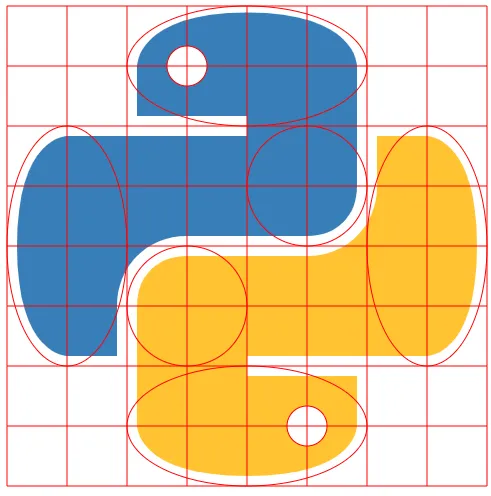

**Python** es un lenguaje de programación ampliamente adoptado en el mundo del análisis de datos, especialmente en el procesamiento y análisis de datos geoespaciales. Sus características destacadas incluyen:

- **Facilidad de uso:** Ideal para principiantes y profesionales.
- **Flexibilidad:** Adaptable a diferentes proyectos y necesidades.
- **Variedad de bibliotecas:** Ofrece herramientas especializadas para diversas tareas.

### **Bibliotecas y Herramientas Esenciales**

En este tutorial, nos centraremos en herramientas que han demostrado ser cruciales para el análisis de datos geoespaciales en Python. Cada una de estas herramientas tiene un propósito específico que detallaremos a continuación:

1. **Conda**
   - **Descripción:** Herramienta para crear y gestionar entornos virtuales de Python.
   - **Beneficios:** Facilita la gestión de recursos y la compatibilidad entre diferentes proyectos.
   - [Más Información](https://docs.conda.io/en/latest/)
  
2. **GDAL**
   - **Descripción:** Biblioteca especializada en datos geoespaciales.
   - **Beneficios:** Permite leer, escribir y transformar datos en distintos formatos.
   - [Más Información](https://gdal.org/)
   
3. **Scikit-learn**
   - **Descripción:** Biblioteca para el aprendizaje automático en Python.
   - **Beneficios:** Ofrece algoritmos de clasificación, regresión, agrupamiento y más.
   - [Más Información](https://scikit-learn.org/stable/)
  
4. **TPOT**
   - **Descripción:** Herramienta de optimización de pipelines de aprendizaje automático.
   - **Beneficios:** Automatiza la selección y ajuste de modelos, mejorando precisión y rendimiento.
   - [Más Información](https://epistasislab.github.io/tpot/)
  
5. **RSGISLib**
   - **Descripción:** Biblioteca para procesar datos de teledetección y SIG.
   - **Beneficios:** Maneja grandes cantidades de datos y facilita procesos complejos.
   - [Más Información](http://rsgislib.org/)
  
6. **Qgis**
   - **Descripción:** Software para visualizar, editar y analizar datos geoespaciales.
   - **Beneficios:** Facilita la evaluación de resultados en procesos de detección.
   - [Más Información](https://www.qgis.org/es/site/)

### **Herramientas**

Mediante la combinación de estas herramientas y técnicas, podrás enfrentarte al desafío de clasificar áreas urbanas en imágenes Sentinel-2. Estarás equipado para preparar datos, entrenar modelos y evaluar resultados de manera eficiente. Recordemos que el poder de estas herramientas, especialmente cuando se utilizan juntas, es esencial para proyectos en campos como la agricultura, el medio ambiente y la planificación urbana.



# Estrategia General para Clasificación de Áreas Urbanas en Imágenes Sentinel-2


Este tutorial tiene como objetivo enseñar cómo se pueden utilizar múltiples capas de información raster para crear una base de datos de características, y cómo esta información se puede clasificar utilizando herramientas de aprendizaje automático.

## Pasos del Tutorial

### 1. Preparación de Datos Raster

- Crear múltiples capas de información raster.
- Estas capas construirán una base de datos con características etiquetadas en la columna `klass`.
  
### 2. Asociación de Identificadores

- Añadir un identificador único a la base de datos.
- Esto permitirá asociar polígonos geográficos y facilitará la construcción de mapas al concluir el proceso.

### 3. Obtención de Capas Iniciales

- **a.** Geomediana Sentinel-2 de Aguascalientes, México:
  - Contiene 12 bandas espectrales.
  - Archivo: `GM_AGS_2020.tif`.
  
- **b.** Imagen TIFF para identificación de áreas:
  - Resolución idéntica a la geomediana.
  - Áreas urbanas: valor 1.
  - Áreas no urbanas: valor 2.
  - Archivo: `Etiquetas_1_urbano_2_no_urbano.tif`.
  
- **c.** Imagen de Referencia en formato KEA:
  - Dimensiones: 100m x 100m.
  - Derivada de un grid de igual tamaño.
  - Uso de la biblioteca RSGISLib.
  - Archivo: `grid_100m.kea`.

> **Nota:** El formato KEA es altamente eficiente para el acceso de datos raster. Incorporando un Raster Attribute Table (RAT) permitirá guardar más información por cada píxel, optimizando el análisis y manipulación de datos geoespaciales.

### 4. Asociación de Información

- Vincular cada celda del grid con:
  - Etiquetas correspondientes.
  - Proporciones.
  - Bandas espectrales de la imagen geomediana.
- Utilización de la biblioteca RSGISLib.

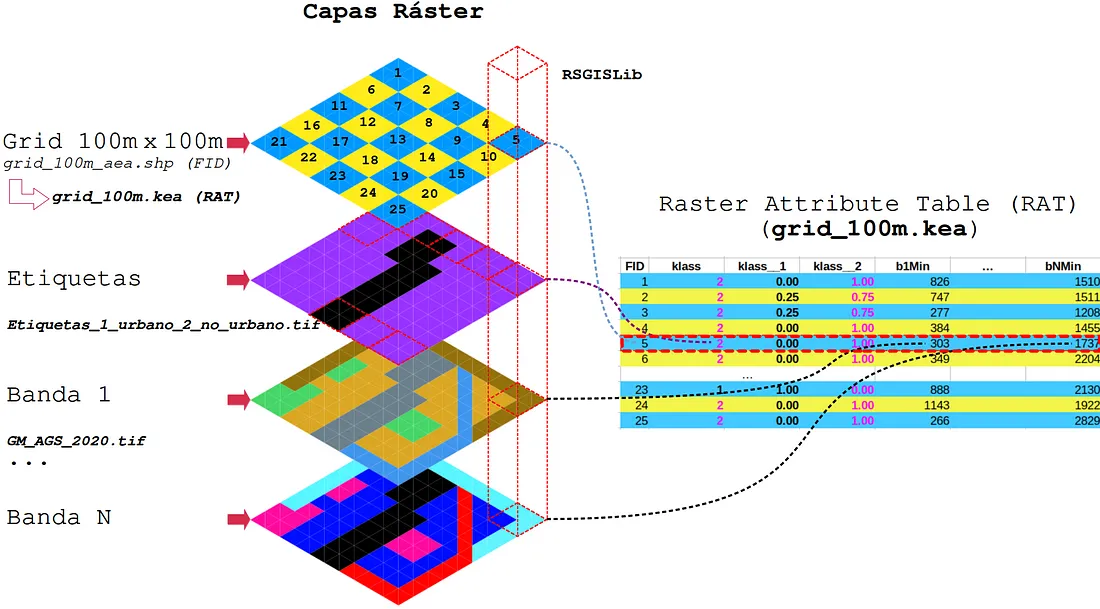

### 5. Aplicación del Clasificador con AutoML

- Utilizaremos un pipeline generado a través de **TPOT**, una herramienta avanzada dentro del campo del AutoML (Aprendizaje Automático Automatizado).
  
  > **Nota sobre AutoML y TPOT:** AutoML se refiere al proceso de automatizar la selección y entrenamiento de modelos de aprendizaje automático, facilitando así la construcción de soluciones de inteligencia artificial sin necesidad de ser un experto en el tema. TPOT, en particular, es una herramienta de AutoML basada en Python que emplea algoritmos genéticos para optimizar pipelines de aprendizaje automático, ayudando a encontrar las mejores combinaciones de procesos y parámetros para un conjunto de datos particular.

- Aplicaremos un clasificador que ha sido previamente entrenado para tareas específicas de clasificación de imágenes satelitales utilizando esta metodología.


### **Datos**

#### Mosaicos libres de nubes de Aguascalientes, México

Para llevar a cabo la clasificación urbana en imágenes satelitales Sentinel-2, se utilizarán datos del estado de Aguascalientes, México, correspondientes a los años 2017 a 2021. Estos datos consisten en 2,815 imágenes de la región de interés, las cuales fueron procesadas utilizando la plataforma **Open Data Cube (ODC)** [Lewis et al. (2017), Gavin et al. (2018), [ODC Website](https://www.opendatacube.org/)]. Esta plataforma permite el acceso y análisis de grandes volúmenes de datos de teledetección.

Las imágenes fueron utilizadas para generar mosaicos anuales libres de nubes mediante la aplicación del algoritmo de mediana geométrica (geomediana), tal como se define en [Roberts et al. (2017)].

> **Geomediana:** Es un método matemático utilizado para calcular el valor central de un conjunto de datos multivariados, es decir, una medida de tendencia central. En el contexto de las imágenes satelitales, la geomediana propuesta por Dale Roberts et al. sirve para calcular un valor medio de píxeles en una serie temporal de imágenes Sentinel-2 para un área específica. Esta técnica es eficaz para eliminar el ruido y las nubes en las imágenes, resultando en una representación más clara de la región analizada.
Esquema simplificado de la mediana geométrica
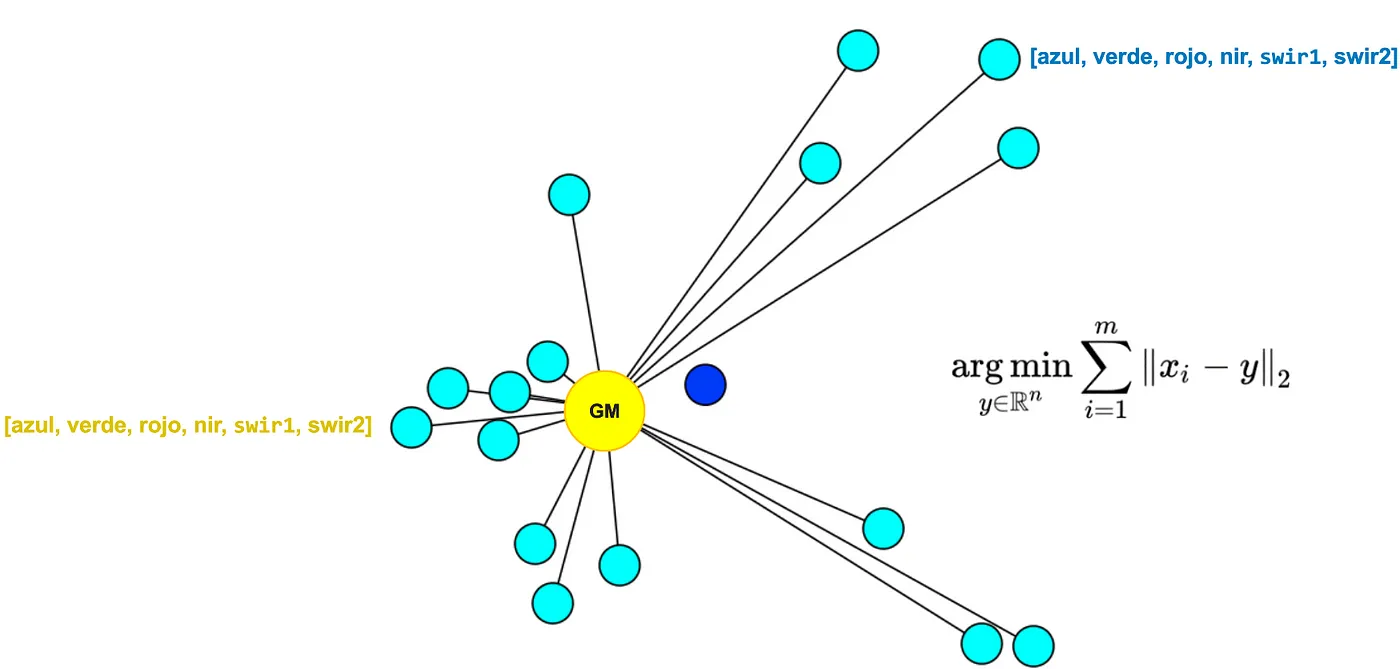

Aplicando la geomediana a una serie temporal de imágenes satelitales, como las de Aguascalientes, se consigue una imagen promedio que evidencia la información relevante y suprime interferencias como el ruido y las nubes. Esta metodología es esencial para el análisis de alteraciones en la superficie terrestre, como la identificación de áreas urbanas o la transformación de cultivos.

El algoritmo geomediana brinda un resumen a nivel de píxel para cada pixel de la imagen, implicando que cada resumen representa una zona de 10m x 10m en el territorio y sus registros a lo largo de un año.

La sumatoria de estos píxeles forma un compuesto de 12 bandas (aerosol costero, azul, verde, rojo, borde rojo de la vegetación 5, borde rojo de la vegetación 6, borde rojo de la vegetación 7, cercano al infrarrojo, infrarrojo estrecho, vapor de agua, swir1 y swir2) del estado de Aguascalientes.

Estos datos procesados y la composición creada son esenciales para detectar y clasificar zonas urbanas utilizando técnicas de Machine Learning, una herramienta crucial para la planeación y desarrollo urbano, así como para decisiones en ámbitos como la gestión de recursos naturales y la evaluación de riesgos.


#### Geomediana Sentinel-2 del año 2020; Aguascalientes, México

Para comenzar la clasificación de áreas urbanas en las imágenes Sentinel-2, el primer paso es descargar las imágenes que se usarán en este tutorial. Estas imágenes han sido generadas por el autor de este blog y sus colegas [Coronado et al. (2022)], y están disponibles en el siguiente enlace:

[Descargar imágenes](https://doi.org/10.5281/zenodo.6908357)

Una vez dentro del enlace, puedes descargar los archivos necesarios para el tutorial. Es importante señalar que las imágenes están en formato comprimido, por lo que es necesario descomprimirlas previamente.



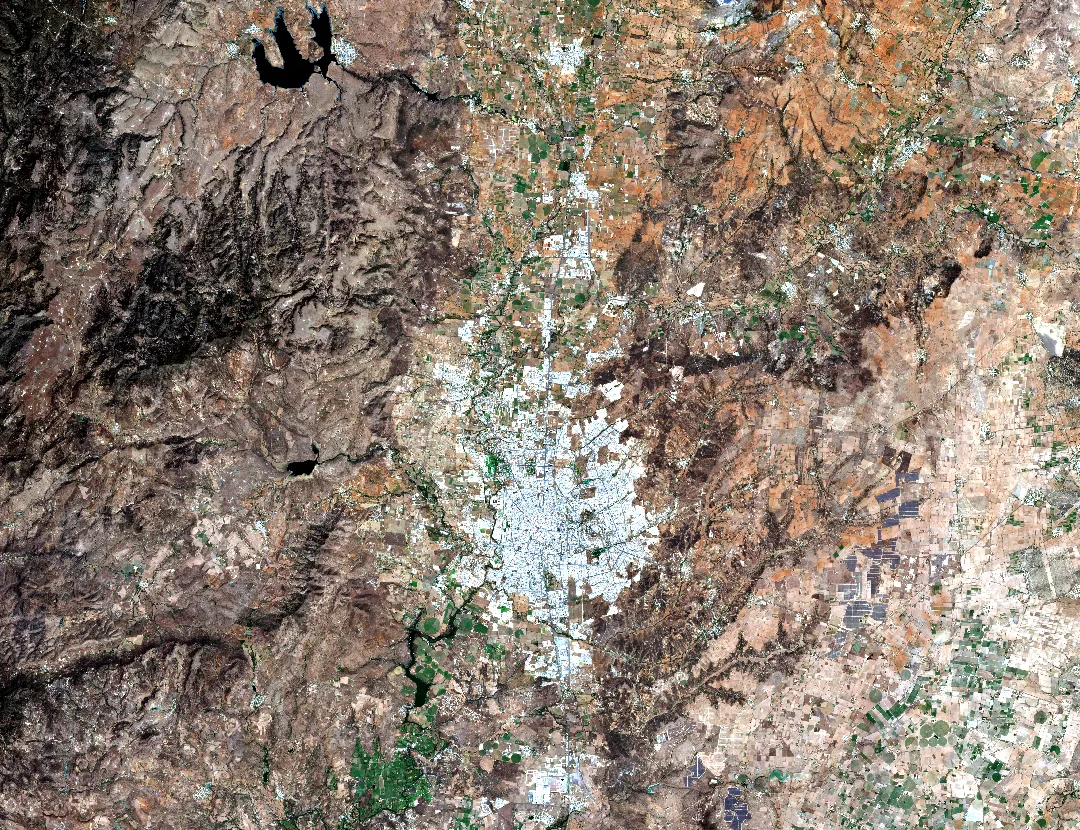

Estas imágenes, que corresponden a los años 2017 a 2021 del Estado de Aguascalientes, han sido procesadas y preparadas por el equipo de investigación para su uso en detección y clasificación de áreas urbanas con Sentinel-2 y Machine Learning. Para este tutorial, nos concentraremos en las imágenes correspondientes al año 2020.




# Montar Google Drive en Google Colab

Google Colab proporciona una forma sencilla de montar tu Google Drive y acceder a tus archivos, así como guardar tus notebooks directamente en Google Drive.

Sigue estos pasos para montar tu Google Drive en Google Colab:

## 1. Abrir un Notebook en Google Colab

Dirígete a [Google Colab](https://colab.research.google.com/) y abre un nuevo notebook o uno existente.

## 2. Montar Google Drive

En una celda del notebook, escribe y ejecuta el siguiente código:

```python
from google.colab import drive
drive.mount('/content/drive')
```

## 3. Autorizar el Acceso

Después de ejecutar la celda, verás un enlace para autorizar a Google Colab a acceder a tu Google Drive. Haz clic en el enlace, elige tu cuenta de Google y acepta los permisos.

Una vez que hayas aceptado los permisos, recibirás un código de autorización. Cópialo, regresa a tu notebook de Google Colab, pega el código en el cuadro de texto que aparece y presiona 'Enter'.

## 4. Acceder a tus archivos

Una vez montado, tu Google Drive aparecerá en el directorio `/content/drive/My Drive/`. Ahora puedes usar este path para acceder a tus archivos y directorios en Google Drive. Por ejemplo, si deseas listar los archivos en tu Google Drive, puedes usar:

```python
!ls "/content/drive/MyDrive/"
```

¡Eso es todo! Ahora tienes tu Google Drive montado en Google Colab y puedes empezar a trabajar con tus archivos directamente desde el notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -alht /content/drive/MyDrive/


# Localización del Archivo en Google Drive desde Google Colab

Una vez que has montado tu Google Drive en Google Colab, puedes acceder directamente a tus archivos y directorios utilizando rutas específicas.

## Ruta del Archivo

El archivo `GM_AGS_2020_COLMEX.tif` que estás buscando se encuentra en la siguiente ruta:

```
/content/drive/MyDrive/Curso COLMEX 2023/GM_AGS_2020_COLMEX.tif
```

Esta ruta indica que el archivo está dentro de la carpeta "Curso COLMEX 2023" en tu Google Drive. Puedes utilizar esta ruta en tus códigos de Python en Colab para leer, modificar o analizar dicho archivo.


In [ ]:
!ls -alht /content/drive/MyDrive/'Curso COLMEX 2023'

total 4.6G
-rw------- 1 root root 2.1G Sep 18 21:54 GM_AGS_2020_COLMEX.tif
-rw------- 1 root root 2.5G Jul 23  2022 GM_AGS_2020.tif


---

# Guía Rápida: Optimizar GeoTIFF con GDAL en Google Colab

## ¿Qué es GDAL?

GDAL (Geospatial Data Abstraction Library) es una poderosa biblioteca de código abierto para leer, escribir y traducir formatos de datos geoespaciales. Es ampliamente utilizado en la industria de SIG (Sistemas de Información Geográfica) y es fundamental para muchas operaciones de procesamiento de datos geoespaciales.

## Instalación de GDAL en Google Colab

Para instalar GDAL en Google Colab, sigue los siguientes pasos:

```python
%%time
!apt-get install -y gdal-bin python3-gdal
```

Una vez instalado, puedes verificar la versión de GDAL con:

```python
!gdalinfo --version
```

## Optimizar y Generar Pirámides para el GeoTIFF

Asegúrate de que tu archivo `GM_AGS_2020.tif` esté cargado en Google Colab. Suponiendo que tu archivo está ubicado en `/content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020.tif`, sigue estos pasos:

1. **Optimizar el TIFF**:

   ```python
   !gdal_translate -co TILED=YES -co COMPRESS=DEFLATE -co PREDICTOR=2 /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020.tif /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020_COLMEX.tif
   ```

2. **Crear Pirámides (Overviews)**:

   ```python
   !gdaladdo -r average /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020_COLMEX.tif 2 4 8 16 32 64
   ```

Al finalizar estos pasos, tendrás un archivo GeoTIFF `GM_AGS_2020_COLMEX.tif` optimizado y con pirámides en tu directorio `/content/drive/MyDrive/'Curso COLMEX 2023'/`.

Si deseas utilizar GDAL directamente en Python dentro de Google Colab, simplemente importa `gdal` desde `osgeo`:

```python
from osgeo import gdal
```

Puedes abrir la imagen resultante en QGIS:
---

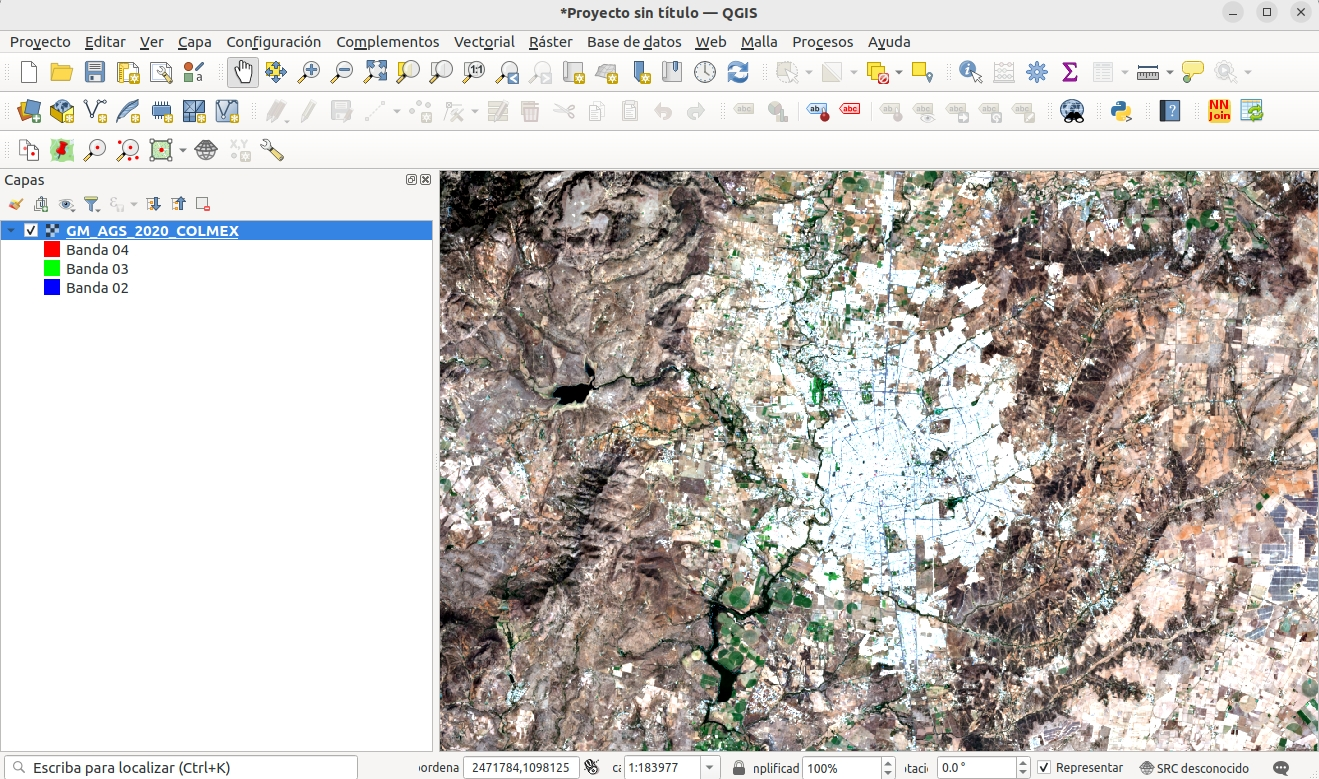

In [ ]:
%%time
!apt-get install -y gdal-bin python3-gdal


In [ ]:
!gdalinfo --version

GDAL 3.4.3, released 2022/04/22


In [ ]:
%%time
!gdal_translate -co TILED=YES -co COMPRESS=DEFLATE -co PREDICTOR=2 /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020.tif /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020_COLMEX_01.tif


Input file size is 11086, 10005
0...10...20...30...40...50...60...70...80...90...100 - done.
CPU times: user 1.31 s, sys: 142 ms, total: 1.45 s
Wall time: 2min 35s


In [ ]:
!ls -alht /content/drive/MyDrive/'Curso COLMEX 2023'

total 6.0G
-rw------- 1 root root 1.5G Sep 20 19:28 GM_AGS_2020_COLMEX_01.tif
-rw------- 1 root root 2.1G Sep 18 21:54 GM_AGS_2020_COLMEX.tif
-rw------- 1 root root 2.5G Jul 23  2022 GM_AGS_2020.tif


In [ ]:
%%time
!gdaladdo -r average /content/drive/MyDrive/'Curso COLMEX 2023'/GM_AGS_2020_COLMEX_01.tif 2 4 8 16 32 64


0...10...20...30...40...50...60...70...80...90...100 - done.
CPU times: user 677 ms, sys: 89.9 ms, total: 767 ms
Wall time: 1min 24s


In [ ]:
!ls -alht /content/drive/MyDrive/'Curso COLMEX 2023'

total 6.6G
-rw------- 1 root root 2.1G Sep 20 19:35 GM_AGS_2020_COLMEX_01.tif
-rw------- 1 root root 2.1G Sep 18 21:54 GM_AGS_2020_COLMEX.tif
-rw------- 1 root root 2.5G Jul 23  2022 GM_AGS_2020.tif


---

## Capa nacional de los Polígonos de Localidades Urbanas y Rurales Amanzadas del Marco Geoestadístico del Censo de Población y Vivienda 2020 de México

Para la clasificación automática de zonas urbanas mediante Machine Learning, es esencial acceder a datos geoespaciales precisos. Una fuente primordial es el Marco Geoestadístico del Censo de Población y Vivienda 2020 proporcionado por el INEGI. Específicamente, nos enfocaremos en la capa nacional de los Polígonos de Localidades Urbanas y Rurales Amanzadas, que brindan una delimitación detallada de las zonas urbanas para su comparación con las imágenes Sentinel-2.

### Descarga de Datos

Los datos se pueden obtener directamente del sitio web del INEGI:
[Descargar aquí](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469).

Tras descargar el archivo titulado `mg_2020_integrado.zip` y proceder a descomprimirlo, se revelará el formato shapefile bajo el nombre `00l.shp`, que se encuentra dentro del subdirectorio `conjunto_de_datos`.

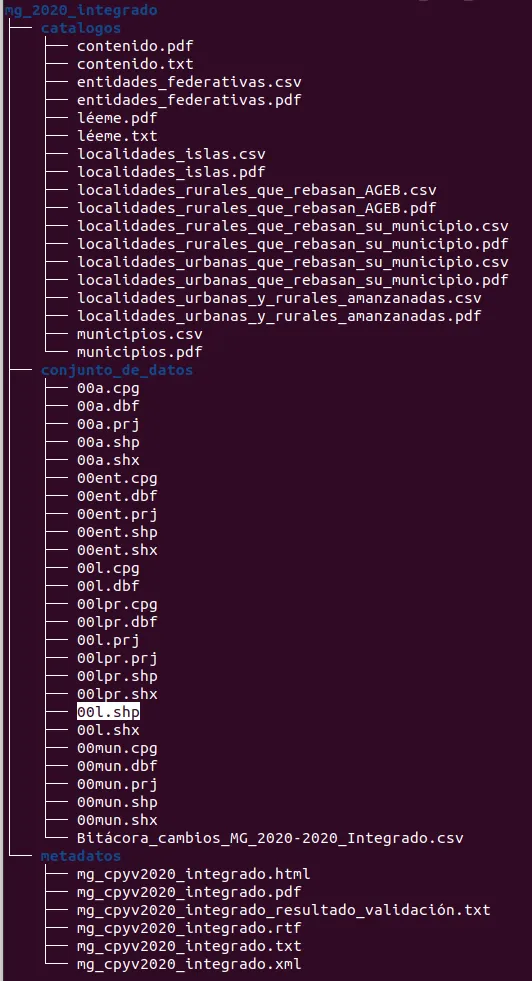

### Visualización en QGIS

Para visualizar la capa geoespacial:

1. Abre QGIS.
2. Arrastra y suelta el archivo `00l.shp` en la ventana principal.
3. En el panel de capas, asegúrate de que la capa `00l.shp` esté activa y visible.
4. Para inspeccionar la tabla de atributos, haz clic en el ícono en forma de tabla y asegúrate de seleccionar la vista de tabla.

Dentro de la capa, para diferenciar las localidades rurales de las urbanas, puedes asignarles colores distintivos, por ejemplo, azul para zonas urbanas y rosa para zonas rurales amanzanadas.

### Interpretación de Datos

Es vital comprender que, aunque las localidades rurales amanzanadas no cumplen con el umbral de población de zonas urbanas, su estructura es claramente urbana en las imágenes. Por ello, se recomienda tratar tanto las zonas urbanas como las rurales amanzanadas como una única categoría de "URBANA". Esta clasificación facilita la identificación de estructuras urbanas por el algoritmo de Machine Learning.

En resumen, la capa geoespacial distingue las Localidades Urbanas (en azul) y las Rurales Amanzadas (en rosa) del Marco Geoestadístico del Censo de Población y Vivienda 2020 de México, y esta información es esencial para la correcta clasificación y análisis de áreas urbanas.

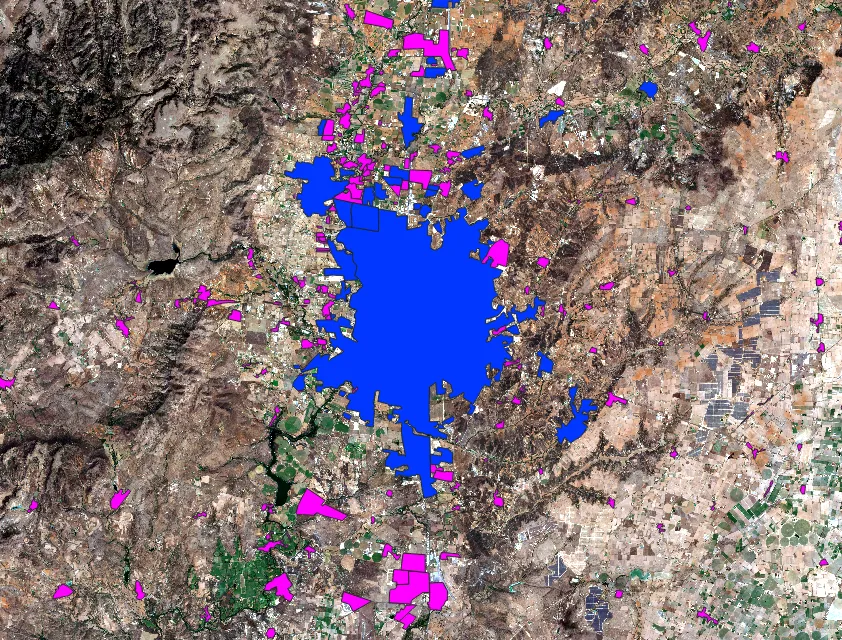

---


---

## Generación de Grid de Referencia en QGIS para Clasificación de Zonas Urbanas con Imágenes Sentinel-2

La generación de un grid de referencia es una herramienta valiosa en la segmentación para la clasificación automática de zonas urbanas usando imágenes Sentinel-2. Este grid, compuesto por celdas de 100m x 100m, agrupa píxeles de imágenes en regiones específicas, facilitando el proceso de clasificación. A continuación, se presenta una guía para crear este grid en QGIS, una herramienta gratuita de geoprocesamiento.

### Pasos para Generar el Grid:

1. **Carga de Datos Iniciales:**
   - Abre QGIS.
   - Carga la capa de la Geomediana 2020 de Aguascalientes.
   
2. **Configuración del SRC:**
   - Selecciona la capa cargada.
   - Haz clic con el botón derecho y elige “SRC de la Capa”.
   - Selecciona “Establecer SRC del proyecto a partir de la capa”.

3. **Creación del Grid:**
   - Dirígete al menú principal.
   - Elige la opción “Vectorial” y posteriormente “Herramientas de investigación”.
   - Haz clic en “Crear cuadrícula”.
   - Configura los siguientes parámetros en la ventana emergente:
     - Tipo de geometría: Polígono
     - Extensión: Usa los valores de la extensión de la Geomediana 2020.
     - Espaciado horizontal: 100
     - Espaciado vertical: 100
   - Haz clic en “Aceptar”.

4. **Guardar y Nombrar el Grid:**
   - Una vez generada la cuadrícula, asigna un nombre descriptivo a la capa resultante, por ejemplo: “grid_100m_aea.shp”.

Con este grid de referencia en mano, estás preparado para avanzar en la clasificación automática de zonas urbanas utilizando imágenes Sentinel-2 y técnicas de Machine Learning.

---


# Generación de las etiquetas

Como parte de la preparación para el proceso de clasificación de machine learning, es crucial que la información que se planea utilizar esté en formato raster. La razón principal es que el formato raster simplifica la creación de la base de datos de clasificación que se empleará en este tutorial.

Vamos a aprovechar la biblioteca `rsgislib`, que brinda herramientas altamente eficientes para el manejo de vastos conjuntos de datos raster y facilita la extracción de datos de todas las capas raster.

En esta sección, aprenderemos a generar una imagen geotiff a una resolución de 10 m, alineada a la geometría de Sentinel-2. Este paso asegura una mejor integración de los datos en el proceso de clasificación.

## Usando QGIS para generar el raster de etiquetas

Para crear un raster de etiquetas, emplearemos el software libre QGIS. Aquí están los pasos detallados:

1. **Abrir la capa de información**: Inicia con la capa de datos que descargaste del Marco Geoestadístico del Censo de Población y Vivienda 2020 de México. Selecciona los polígonos de tu interés.
  
2. **Guardar en la proyección adecuada**: Asegúrate de guardar estos polígonos en una proyección albers, para que coincida con la imagen satelital.

3. **Creación del campo "klass"**: En estos polígonos, crea un campo llamado "klass". Asigna un valor de 1 para las regiones urbanas. Luego, para las regiones no urbanas, genera una capa vectorial y dale un valor de "klass" de 2.

4. **Rasterización**: Con las regiones definidas, inicia el proceso de rasterización. Este paso te dará un archivo `.tif` que tiene los valores de píxel para las zonas urbanas y no urbanas. Usaremos este archivo en los próximos pasos de clasificación.

¿Prefieres una guía visual? Hemos preparado un video que muestra este proceso paso a paso.

[![Instrucciones en video](https://img.youtube.com/vi/fAv77myBQX8/0.jpg)](https://youtu.be/fAv77myBQX8?si=iBAo9LH2PTIpsFDK)

> **Nota:** Necesitas un archivo shapefile que cubra la región de Aguascalientes para este tutorial. Puedes descargarlo [aquí](https://drive.google.com/file/d/1K4Cn2-HHDxfvb9YBdFfS8zGUOjbGPK50/view?usp=sharing).

---